In [1]:
import urllib
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

print ("Packages loaded")

Packages loaded


# Get it!

In [2]:
dates = []
date_strs = []
last_trade_prices = []
for nrpage in range(200):
    rawurl = "http://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page="
    url = rawurl + str(nrpage+1)
    # Get data (parse)
    soup = BeautifulSoup(urllib.urlopen(url).read())
    dateinfo  = soup.find_all('td', {'class': 'date'})
    valueinfo = soup.find_all('td', {'class': 'number_1'})
    nrdata    = len(valueinfo)
    for i in range(nrdata):
        # Date
        currdate = str(dateinfo[int(i/4)])
        currdate = currdate.replace('<td class="date">', '')
        currdate = currdate.replace('</td>', '')
        currdate = currdate.replace('.', "")

        # Values
        currdata = str(valueinfo[i])
        currdata = currdata.replace('<td class="number_1">', "")
        currdata = currdata.replace('</td>', "")
        currdata = currdata.replace('<span class="tah p11 red01">', '')
        currdata = currdata.replace('</span>', "")
        currdata = currdata.replace('<td class="number_1" style="padding-right:40px;">', "")
        currdata = currdata.replace('<td class="number_1" style="padding-right:30px;">', "")
        currdata = currdata.replace('<span class="tah p11 nv01">', "")
        currdata = currdata.replace(' ', "")
        currdata = currdata.replace('\n', "")
        currdata = currdata.replace('\t', "")
        currdata = currdata.replace(',', "")

        if i % 4 == 0:
            print ("\nCurr date is %s" % (currdate))
            date_strs.append(currdate)
            dates.append(float(currdate))
            print ("Last traded price: %s" % (currdata))
            last_trade_prices.append(float(currdata))
        elif i % 4 == 1:
            print ("Fluctuation ratio: %s" % (currdata))
        elif i % 4 == 2:
            print ("Traded volume:     %s" % (currdata))
        elif i % 4 == 3:
            print ("Traded price:      %s" % (currdata))
# Reverse 
dates.reverse()
date_strs.reverse()
last_trade_prices.reverse()


Curr date is 20160725
Last traded price: 2009.52
Fluctuation ratio: -0.04%
Traded volume:     209464
Traded price:      2075669

Curr date is 20160722
Last traded price: 2010.34
Fluctuation ratio: -0.09%
Traded volume:     316365
Traded price:      3686869

Curr date is 20160721
Last traded price: 2012.22
Fluctuation ratio: -0.16%
Traded volume:     387481
Traded price:      3847464

Curr date is 20160720
Last traded price: 2015.46
Fluctuation ratio: -0.07%
Traded volume:     309989
Traded price:      3438452

Curr date is 20160719
Last traded price: 2016.89
Fluctuation ratio: -0.21%
Traded volume:     377425
Traded price:      3693836

Curr date is 20160718
Last traded price: 2021.11
Fluctuation ratio: +0.19%
Traded volume:     376256
Traded price:      3489650

Curr date is 20160715
Last traded price: 2017.26
Fluctuation ratio: +0.42%
Traded volume:     473600
Traded price:      4557938

Curr date is 20160714
Last traded price: 2008.77
Fluctuation ratio: +0.16%
Traded volume:     33

# Plot

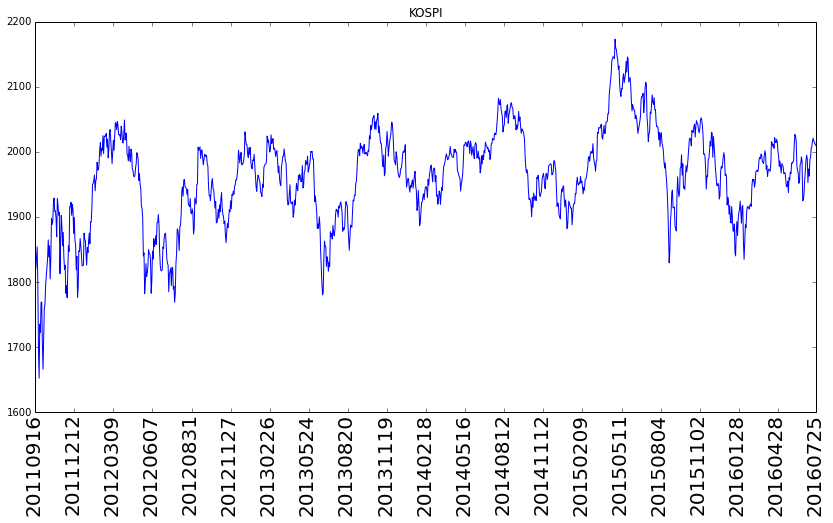

In [3]:
plt.figure(1, figsize=(14, 7))
n = len(last_trade_prices)
x = range(n)
step = int(n/20)
xtick_input = x[0:n:step]
xtick_input.append(x[-1])
xtick_str = date_strs[0:n:step]
xtick_str.append(date_strs[-1])
plt.xticks(xtick_input, xtick_str, fontsize=20
           , rotation='vertical')
plt.plot(x, last_trade_prices, "-")
plt.title("KOSPI")

# GPR on this data

## Kernel function

In [4]:
def kernel_se(X1, X2, g2, l2, w2):
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    K  = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            x1 = X1[i, :]
            x2 = X2[j, :]
            d  = x1 - x2
            K[i, j] = g2*np.exp(-d*d/(l2))
            if n1 > 1 and i == j:
                K[i, j] = K[i, j] + w2
    return K
print ("Kernel function defined")

Kernel function defined


## GPR

GPR ready


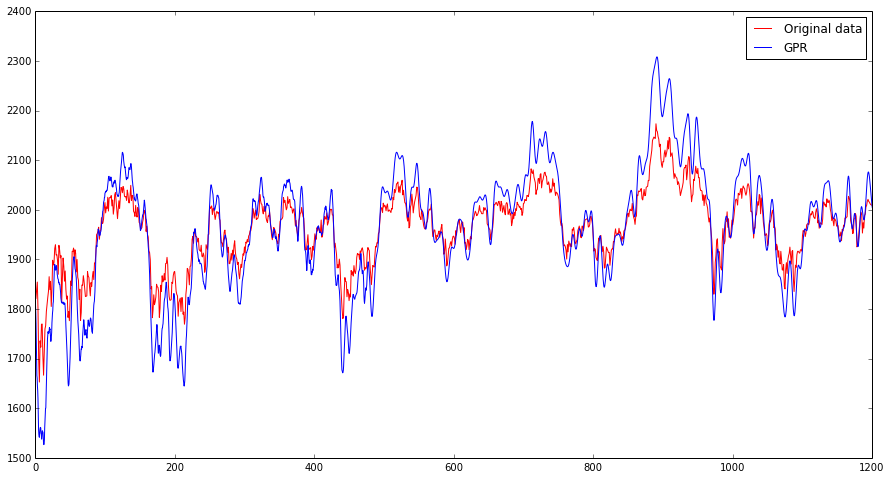

In [39]:
xdata = np.array(x).reshape(-1, len(x)).T
ydata = np.array(last_trade_prices).reshape(-1, len(last_trade_prices)).T
ydata_mz = ydata - np.mean(ydata)
xtest = xtest = np.array([np.linspace(0, 1200, 3000)]).T
g2    = 1
l2    = 30
w2    = 1e-1
Kdata = kernel_se(xdata, xdata, g2, l2, w2)
alpha = np.matmul(np.linalg.inv(Kdata), ydata_mz)
Ktest = kernel_se(xtest, xdata, g2, l2, w2)
ytest = np.matmul(Ktest, alpha) + np.mean(ydata)
print ("GPR ready")

# Plot 
plt.figure(1, figsize=(15, 8))
plt.plot(xdata[:, 0], ydata[:, 0], 'r-', label='Original data')
plt.plot(xtest[:, 0], ytest[:, 0], 'b-', label='GPR')
plt.legend()

In [43]:
import pandas
